In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
from shutil import copyfile


plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
def plotting(var_list,legend_list,log_scale=False,Title=None):
    i=0
    for var in var_list:
        i += 1
        x = range(len(var))
        plt.plot(x,var,linestyle="",marker="*",markersize=15,label=legend_list[i-1])
    plt.legend()    
    plt.ylabel("alpha [1e8]")
    plt.xlabel("run")
    if(log_scale==True):plt.yscale("log")
    if(Title):plt.title(Title)
    plt.show()
    return

In [8]:
fdir = "/data/new_trap_processed/mockfiles/20200320/output/noise/SBiN_4/"


In [9]:
run_no= np.load(fdir+"run_no.npy")
alpha_scale_in = np.load(fdir+"alpha_scale_in.npy")
lambda_val_in = np.load(fdir+"lambda_val_in.npy")
direction_in = np.load(fdir+"direction_in.npy")
phase_shift_in = np.load(fdir+"phase_shift_in.npy")
alpha_scale_bkg_push = np.load(fdir+"alpha_scale_bkg_push.npy")
alpha_scale_bkg_pull = np.load(fdir+"alpha_scale_bkg_pull.npy")


In [10]:
run_no_true = []
results_true = []
lambda_true = []
direction_true = []
phase_shift_true = []
background_scale_push=[]
background_scale_pull=[]

for i in range(15):
    run_no_true.append(run_no[i])
    results_true.append(alpha_scale_in[i])
    lambda_true.append(lambda_val_in[i])
    direction_true.append(direction_in[i])
    phase_shift_true.append(phase_shift_in[i])
    background_scale_push.append(alpha_scale_bkg_push[i])
    background_scale_pull.append(alpha_scale_bkg_pull[i])
    

In [17]:
results_from_Nadav = pd.read_csv("Results_SBiN4/SBiN4_lambda10_NP.csv", header=None).transpose()
results_from_Nadav.columns = ["nadav_alpha_l10_p","nadav_alpha_10_mle","nadav_alpha_l10_n"]


In [18]:
df_raw=pd.DataFrame()

In [19]:
df_raw["run_no_true"]=run_no_true
df_raw["alpha"]=results_true
df_raw["lambda"]=lambda_true
df_raw["direction"]=direction_true
df_raw["phase_val"]=phase_shift_true
df_raw['background_scale_push']=background_scale_push
df_raw['background_scale_pull']=background_scale_pull


In [20]:
df = df_raw.sort_values(by=['run_no_true']).reset_index()

In [21]:
df = pd.concat([df,results_from_Nadav],axis=1)

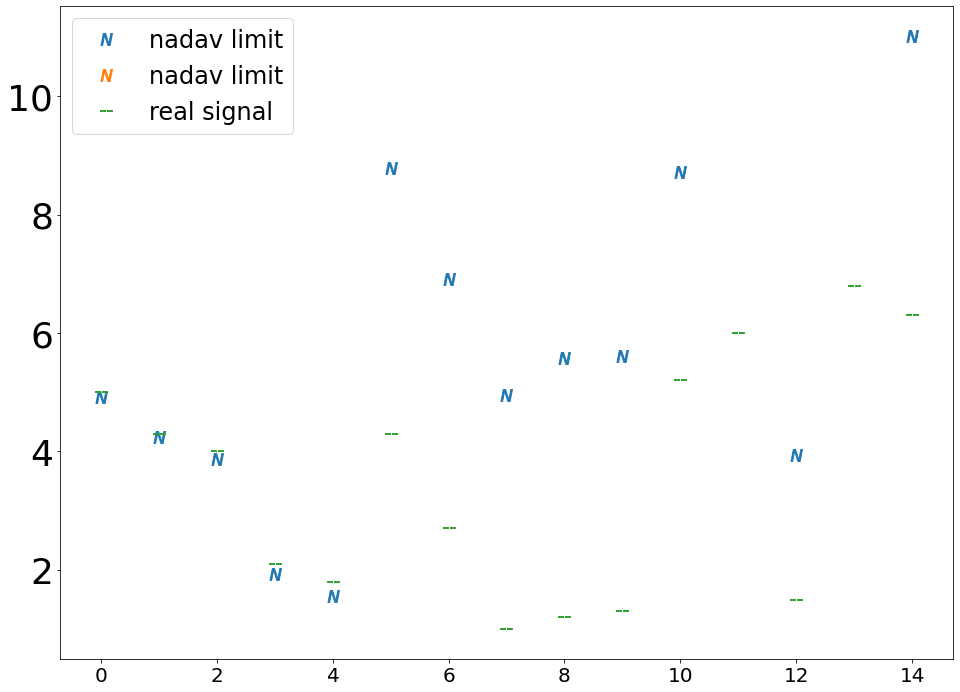

In [22]:
plt.plot(df.nadav_alpha_l10_p,linestyle="",marker="$N$",markersize=12,label="nadav limit")
plt.plot(df.nadav_alpha_l10_n,linestyle="",marker="$N$",markersize=12,label="nadav limit")

plt.plot(df.alpha/1e8,linestyle="",marker="$----$",markersize=12,label="real signal")
plt.legend()
plt.show()

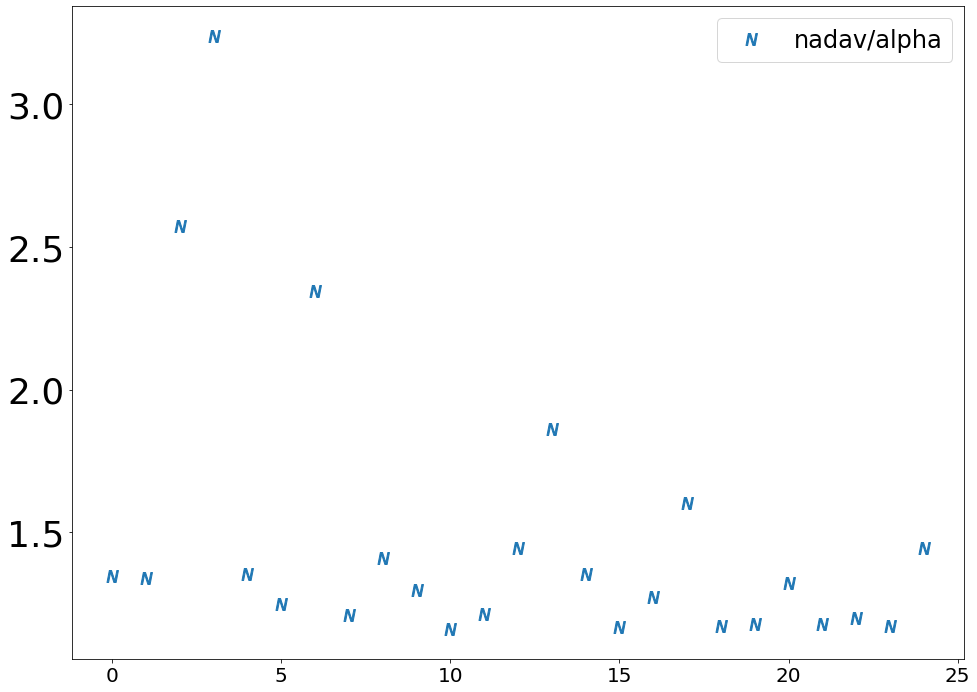

In [33]:
plt.plot(df.nadav_alpha_l10_p/(df.alpha/1e8),linestyle="",marker="$N$",markersize=12,label="nadav/alpha")
plt.legend()
plt.show()

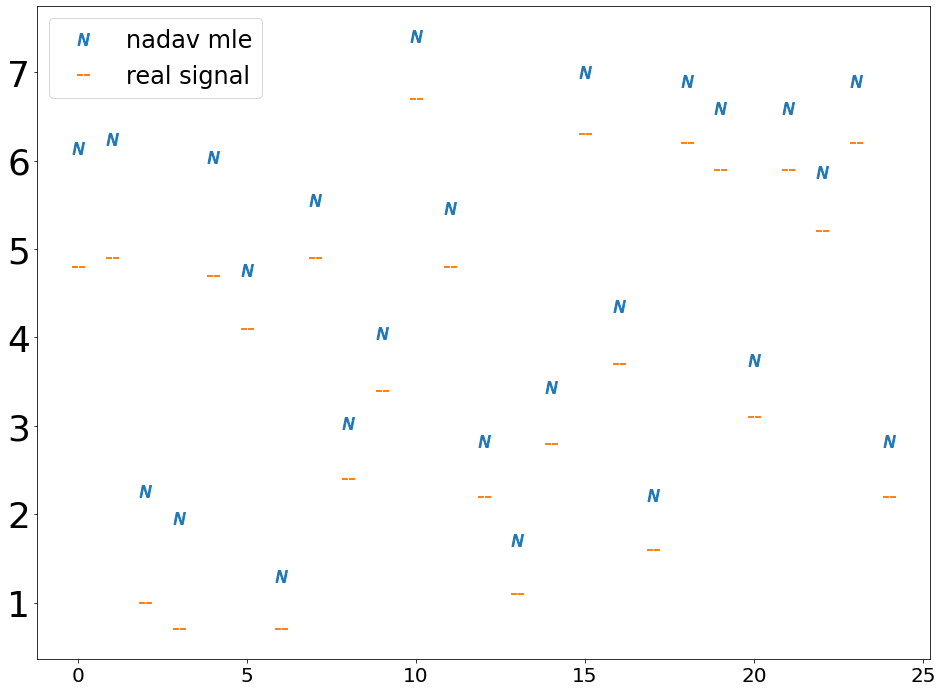

In [34]:
plt.plot(df.nadav_alpha_10_mle,linestyle="",marker="$N$",markersize=12,label="nadav mle")
plt.plot(df.alpha/1e8,linestyle="",marker="$----$",markersize=12,label="real signal")
plt.legend()
plt.show()

In [168]:
mean_list = []
for i in range(20):
    mean_list.append(np.mean(1/df.background_scale[i])/1e8)


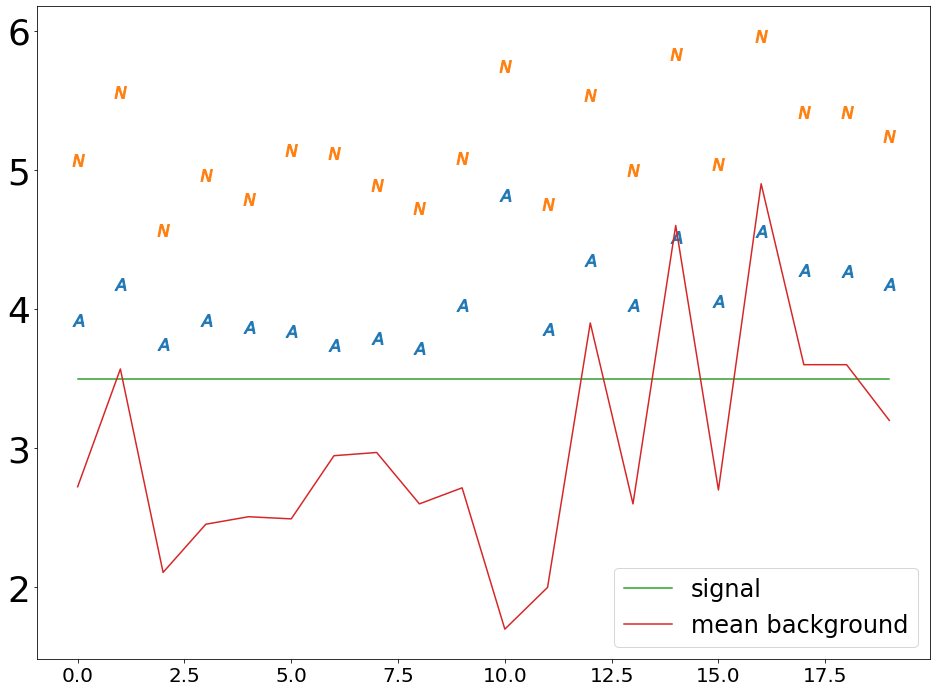

In [171]:
plt.plot(df.akio_alpha_l10_p,linestyle="",marker="$A$",markersize=12)
plt.plot(df.nadav_alpha_l10_p,linestyle="",marker="$N$",markersize=12)

plt.plot(df.alpha/1e8,label="signal")
plt.plot(mean_list,label="mean background")
plt.legend()
plt.show()
#plt.plot(df.nadav_alpha_l10_p)

In [202]:
len(c18m)

100

In [203]:
df["chas_alpha_l5_p"]=c5p
df["chas_alpha_l10_p"]=c10p
df["chas_alpha_l12_p"]=c12p
df["chas_alpha_l18_p"]=c18p
df["chas_alpha_l20_p"]=c20p
df["chas_alpha_l25_p"]=c25p
df["chas_alpha_l31_p"]=c31p
df["chas_alpha_l5_n"]=c5m
df["chas_alpha_l10_n"]=c10m
df["chas_alpha_l12_n"]=c12m
df["chas_alpha_l18_n"]=c18m
df["chas_alpha_l20_n"]=c20m
df["chas_alpha_l25_n"]=c25m
df["chas_alpha_l31_n"]=c31m


In [204]:
t0 = df.alpha[(df["lambda"]==20) & (df["direction"]=="pull") & (df['phase_val']=="TF") ]/1e8
print(t0)
print(len(t0))

43    0.0
Name: alpha, dtype: float64
1


In [30]:
a0a = df.akio_alpha_l10_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
a0b = df.akio_alpha_l25_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]

n0a = df.nadav_alpha_l10_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
n0b = df.nadav_alpha_l25_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]

c0a = df.chas_alpha_l10_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
c0b = df.chas_alpha_l25_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
c0c =  df.chas_alpha_l20_p[(df["lambda"]==20) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]


print(c0c)
print(a0a,a0b)
print(len(a0a),len(a0b))
print(n0a,n0b)
print(len(n0a),len(n0b))
print(c0a,c0b)
print(len(c0a),len(c0b))

KeyError: 'lambda'

In [206]:
t1 = df.alpha[(df["lambda"]==5) & (df["direction"]=="pull") & (df['phase_val']=="TF") ]/1e8
print(t1)
print(len(t1))

1     0.054
28    0.069
34    0.017
47    6.030
49    1.490
63    6.110
71    0.690
82    0.180
97    0.340
Name: alpha, dtype: float64
9


In [207]:
a1 = df.akio_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
n1 = df.nadav_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]
c1 = df.chas_alpha_l5_p[(df["lambda"]==5) & (df["direction"]=="pull")  & (df['phase_val']=="TF")  ]


print(a1,n1,c1)
print(len(a1),len(n1),len(c1))

1     2.35
28    2.37
34    2.34
47    7.12
49    2.85
63    7.21
71    2.60
82    2.40
97    2.48
Name: akio_alpha_l5_p, dtype: float64 1     2.160412
28    2.173889
34    2.128274
47    8.509227
49    3.704910
63    8.606201
71    2.873134
82    2.276774
97    2.443657
Name: nadav_alpha_l5_p, dtype: float64 1     1.349936
28    1.364940
34    1.313699
47    7.246168
49    2.768252
63    7.325782
71    1.978951
82    1.474003
97    1.631971
Name: chas_alpha_l5_p, dtype: float64
9 9 9


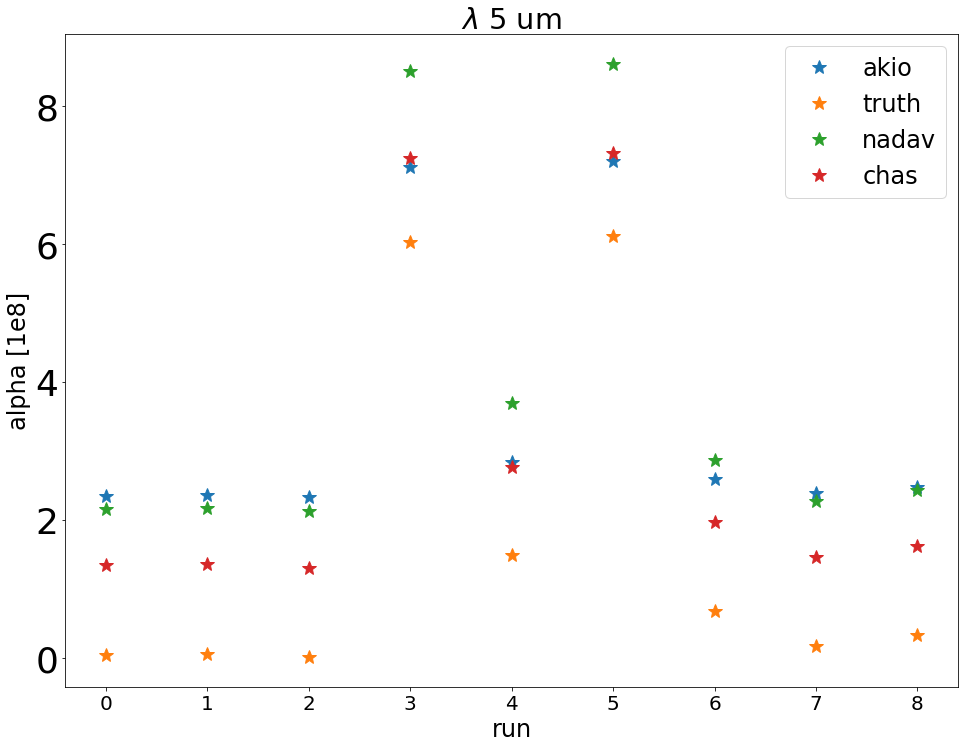

In [208]:
plotting([a1,t1,n1,c1],["akio","truth","nadav","chas"],Title="$\lambda$ 5 um")

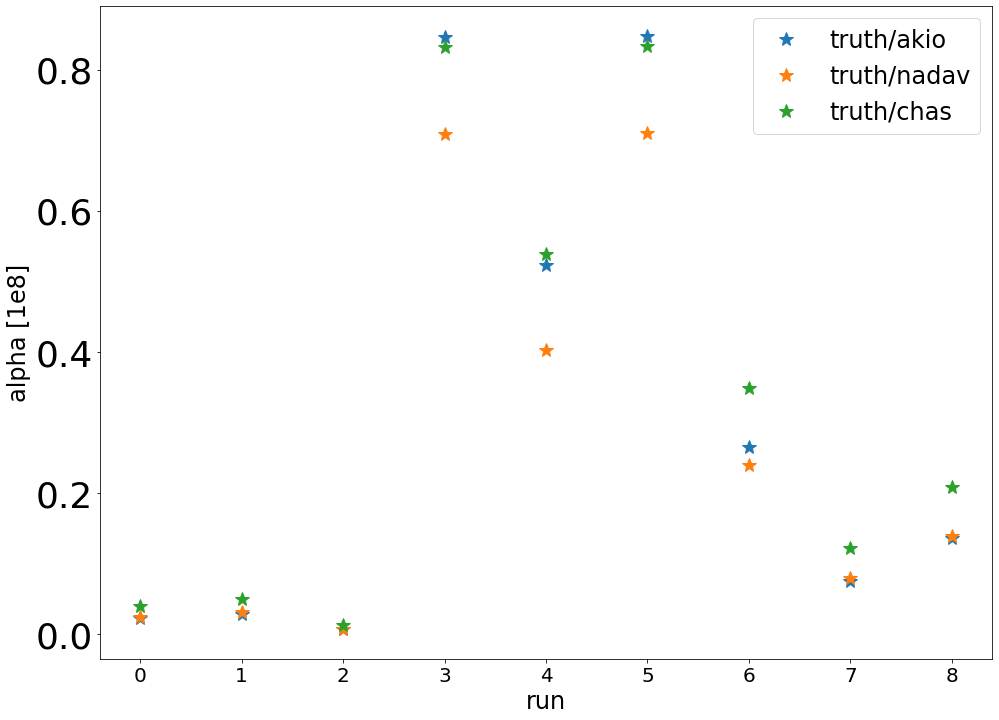

In [209]:
plotting([np.divide(t1,a1),np.divide(t1,n1),np.divide(t1,c1)],["truth/akio","truth/nadav","truth/chas"])

In [210]:
t2=df.alpha[(df["lambda"]==10)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]/1e8
print(t2)
print(len(t2))


8     0.650
11    0.680
12    1.780
18    0.032
21    0.033
22    0.030
23    2.940
33    0.150
50    0.076
62    6.490
67    0.420
69    7.560
92    0.210
94    0.055
99    5.750
Name: alpha, dtype: float64
15


In [211]:
a2 = df.akio_alpha_l10_p[(df["lambda"]==10) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
n2 = df.nadav_alpha_l10_p[(df["lambda"]==10) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
c2 = df.chas_alpha_l10_p[(df["lambda"]==10) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]


print(a2,n2,c2)
print(len(a2),len(n2),len(c2))

8     0.81
11    0.84
12    2.03
18    0.42
21    0.43
22    0.42
23    3.16
33    0.47
50    0.44
62    6.42
67    0.61
69    7.15
92    0.49
94    0.43
99    5.79
Name: akio_alpha_l10_p, dtype: float64 8     1.034707
11    1.065429
12    2.212478
18    0.391461
21    0.392547
22    0.389030
23    3.420804
33    0.514652
50    0.436702
62    7.116434
67    0.796205
69    8.228544
92    0.575635
94    0.415409
99    6.343854
Name: nadav_alpha_l10_p, dtype: float64 8     0.876710
11    0.906264
12    2.004785
18    0.259196
21    0.260102
22    0.257273
23    3.163717
33    0.376981
50    0.302957
62    6.709546
67    0.646384
69    7.778603
92    0.436616
94    0.281878
99    5.970125
Name: chas_alpha_l10_p, dtype: float64
15 15 15


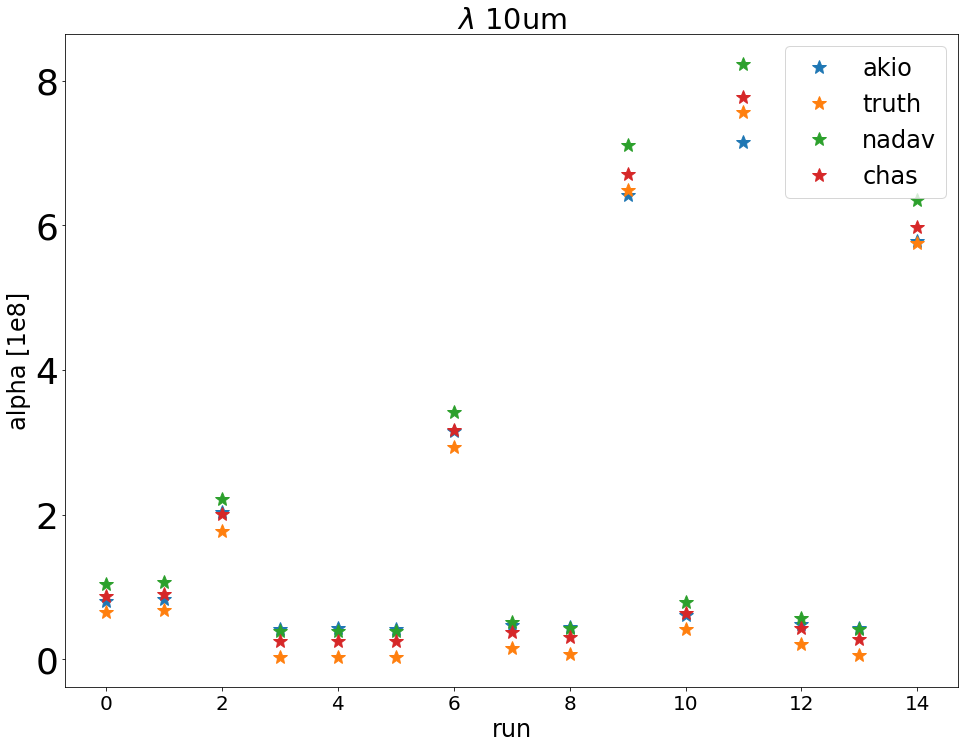

In [212]:
plotting([a2,t2,n2,c2],["akio","truth","nadav","chas"],Title="$\lambda$ 10um")

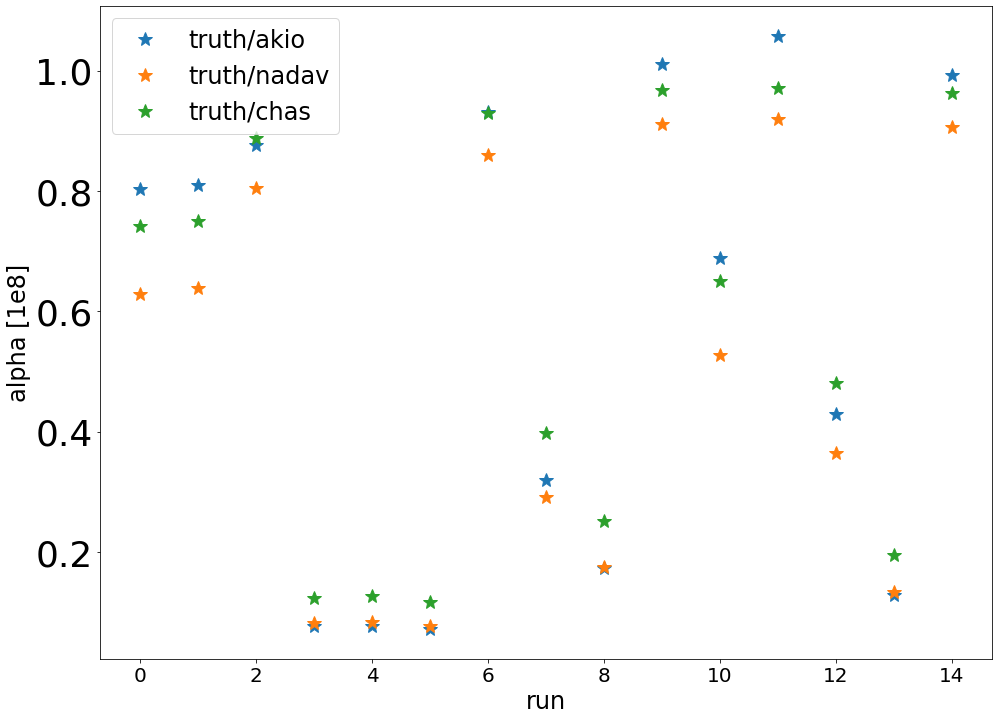

In [213]:
plotting([np.divide(t2,a2),np.divide(t2,n2),np.divide(t2,c2)],["truth/akio","truth/nadav","truth/chas"])

In [214]:
t3=df.alpha[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]/1e8
print(t3)
print(len(t3))

0     0.670
3     0.049
4     0.480
5     0.012
6     3.810
7     0.580
9     4.340
10    0.240
13    2.850
16    0.620
17    1.490
19    0.240
20    0.400
24    5.120
27    0.270
32    0.079
35    0.046
37    0.068
41    0.037
44    1.430
46    0.057
48    0.031
51    0.220
52    0.072
53    4.670
54    5.250
57    6.050
58    4.710
59    0.030
61    0.980
64    7.400
66    0.015
68    0.029
72    0.490
76    0.590
77    0.020
79    3.030
80    0.038
81    5.480
84    4.760
85    0.071
87    0.510
89    0.740
90    0.610
96    0.200
Name: alpha, dtype: float64
45


In [215]:
a3a=df.akio_alpha_l10_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
a3b=df.akio_alpha_l25_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

n3a=df.nadav_alpha_l10_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
n3b=df.nadav_alpha_l25_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

c3a=df.chas_alpha_l10_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
c3b=df.chas_alpha_l25_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
c3c=df.chas_alpha_l18_p[(df["lambda"]==18)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

print(a3a,a3b,n3a,n3b,c3a,c3b)
print(len(a3a),len(a3b),len(n3a),len(n3b),len(c3b))

0      1.41
3      0.45
4      1.04
5      0.42
6      6.65
7      1.25
9      7.29
10     0.62
13     5.28
16     1.33
17     4.00
19     0.61
20     0.88
24     8.04
27     0.66
32     0.47
35     0.45
37     0.46
41     0.44
44     2.80
46     0.45
48     0.44
51     0.59
52     0.46
53     7.67
54     8.20
57     9.12
58     7.66
59     0.43
61     2.01
64    10.94
66     0.42
68     0.43
72     1.06
76     1.27
77     0.43
79     5.56
80     0.44
81     8.49
84     7.72
85     0.46
87     1.10
89     1.55
90     1.31
96     0.56
Name: akio_alpha_l10_p, dtype: float64 0     0.69
3     0.22
4     0.51
5     0.21
6     3.27
7     0.62
9     3.59
10    0.30
13    2.60
16    0.65
17    1.43
19    0.30
20    0.43
24    3.95
27    0.33
32    0.23
35    0.22
37    0.23
41    0.22
44    1.38
46    0.23
48    0.22
51    0.29
52    0.23
53    3.77
54    4.03
57    4.49
58    3.77
59    0.22
61    0.99
64    5.38
66    0.21
68    0.22
72    0.52
76    0.63
77    0.21
79    2.74
80    0.22
81 

In [216]:
print(c3c-t3)

0     0.128513
3     0.127461
4     0.127976
5     0.126521
6     0.137829
7     0.128489
9     0.139613
10    0.127495
13    0.136361
16    0.128385
17    0.130875
19    0.127318
20    0.127760
24    0.142295
27    0.127426
32    0.127401
35    0.126725
37    0.128797
41    0.126517
44    0.131048
46    0.126882
48    0.126718
51    0.127364
52    0.126777
53    0.140815
54    0.142418
57    0.144769
58    0.140988
59    0.126584
61    0.129434
64    0.149814
66    0.126511
68    0.127794
72    0.127839
76    0.128404
77    0.126528
79    0.135763
80    0.126507
81    0.143012
84    0.140976
85    0.126717
87    0.128141
89    0.127502
90    0.128399
96    0.127272
dtype: float64


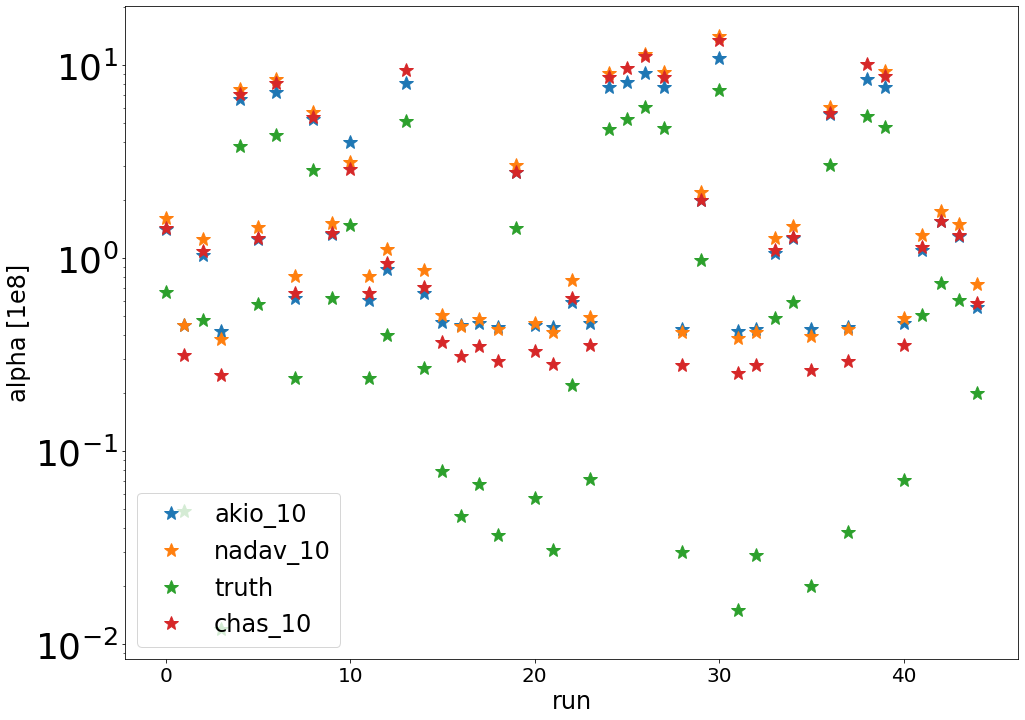

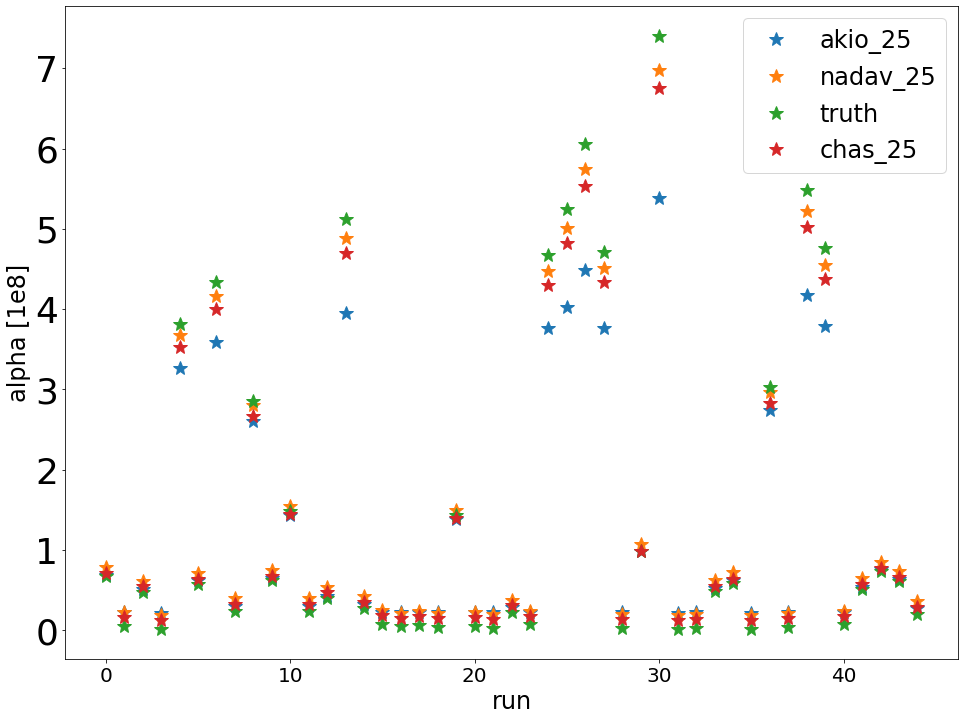

In [217]:
plotting([a3a,n3a,t3,c3a],["akio_10","nadav_10","truth","chas_10"],log_scale=True)
plotting([a3b,n3b,t3,c3b],["akio_25","nadav_25","truth","chas_25"])


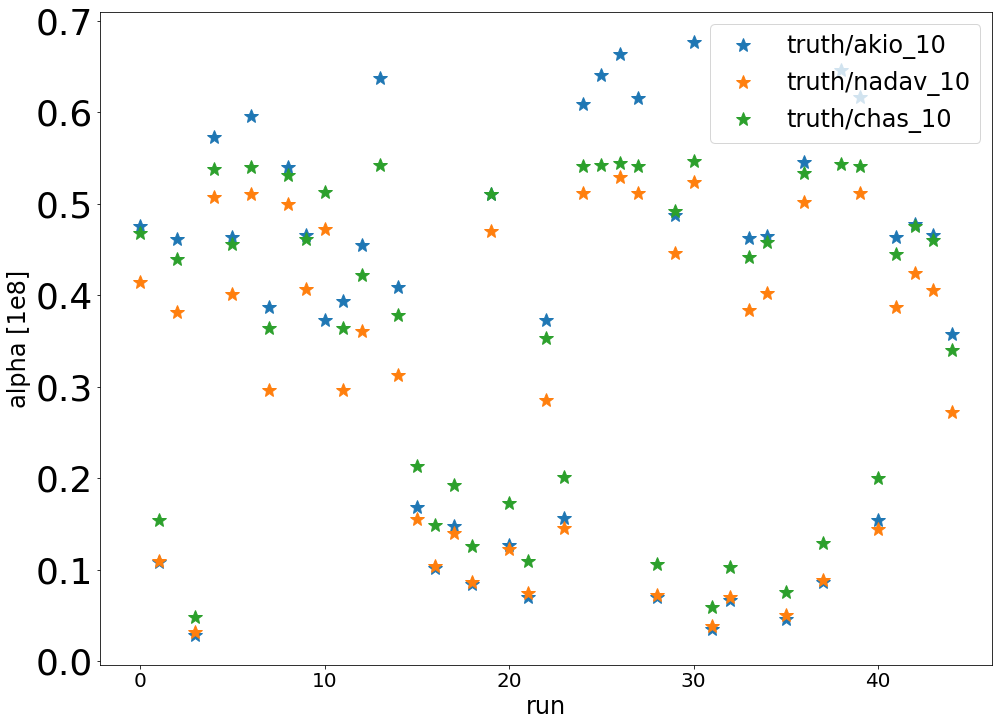

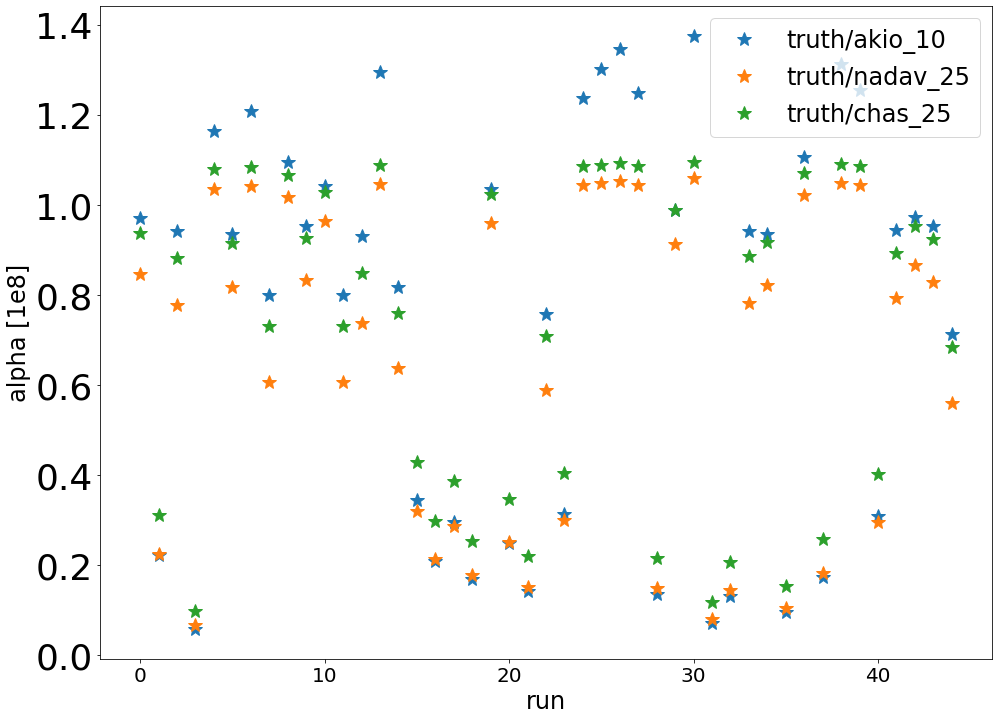

In [218]:
plotting([np.divide(t3,a3a),np.divide(t3,n3a),np.divide(t3,c3a)],["truth/akio_10","truth/nadav_10","truth/chas_10"])
plotting([np.divide(t3,a3b),np.divide(t3,n3b),np.divide(t3,c3b)],["truth/akio_10","truth/nadav_25","truth/chas_25"])


In [219]:
t4=df.alpha[(df["lambda"]==31)  & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]/1e8
print(t4)
print(len(t4))

25    0.110
30    7.440
65    2.120
70    0.066
86    0.018
91    0.180
Name: alpha, dtype: float64
6


In [220]:
c4a = df.chas_alpha_l31_p[(df["lambda"]==31) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]


In [221]:
a4 = df.akio_alpha_l25_p[(df["lambda"]==31) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
n4 = df.nadav_alpha_l25_p[(df["lambda"]==31) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]
c4 = df.chas_alpha_l25_p[(df["lambda"]==31) & (df["direction"]=="pull") & (df['phase_val']=="TF")  ]

print(a4,n4,c4)
print(len(a4),len(n4),len(c4))

25    0.25
30    6.20
65    2.30
70    0.23
86    0.21
91    0.28
Name: akio_alpha_l25_p, dtype: float64 25    0.295130
30    8.294016
65    2.488649
70    0.246406
86    0.194314
91    0.368177
Name: nadav_alpha_l25_p, dtype: float64 25    0.229733
30    7.988799
65    2.357153
70    0.183219
86    0.132160
91    0.303742
Name: chas_alpha_l25_p, dtype: float64
6 6 6


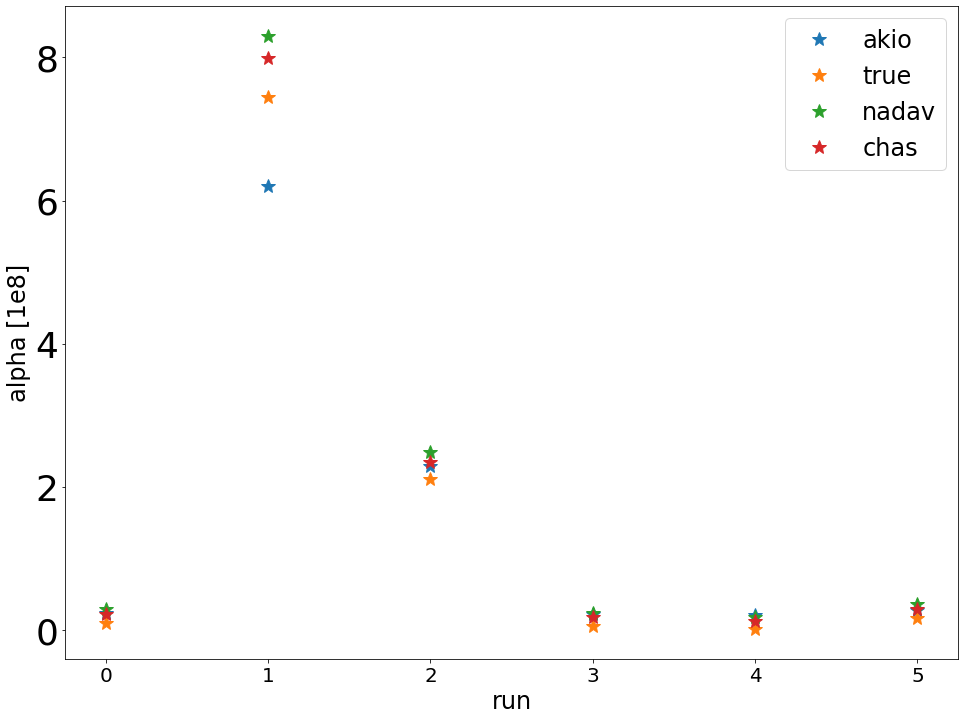

In [222]:
plotting([a4,t4,n4,c4],["akio","true","nadav","chas"])

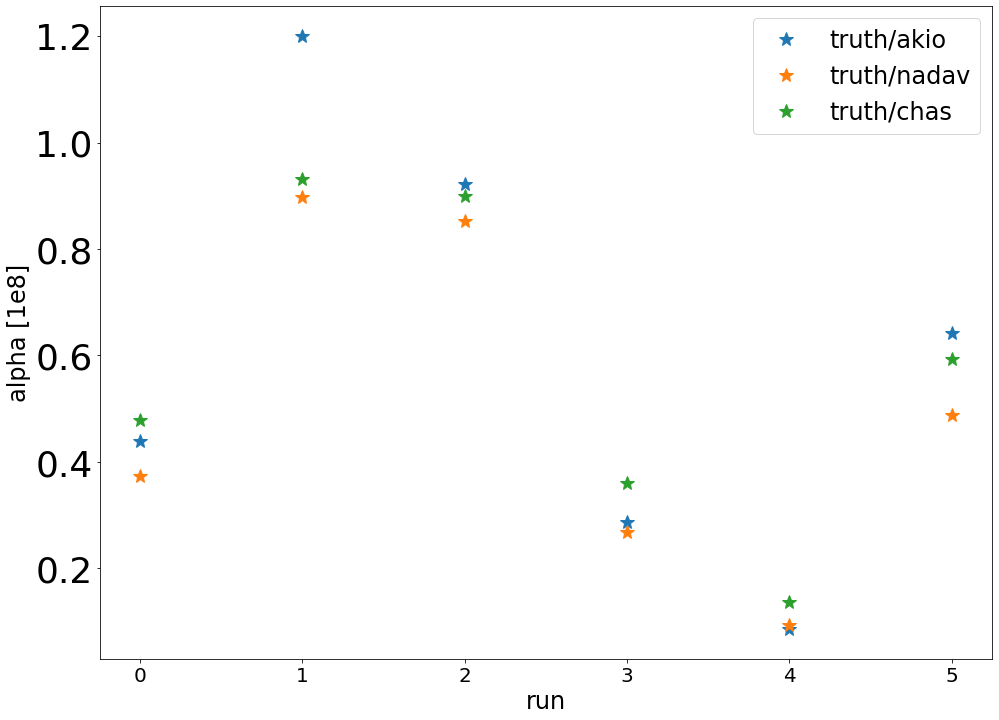

In [223]:
plotting([np.divide(t4,a4),np.divide(t4,n4),np.divide(t4,c4)],["truth/akio","truth/nadav","truth/chas"])

In [224]:
t5 = df.alpha[(df["lambda"]==12) & (df["direction"]=="push")& (df['phase_val']=="TF") ]/1e8
print(t5)
print(len(t5))

14    3.85
29    0.32
39    7.63
56    0.10
73    0.29
74    2.37
83    5.06
95    6.04
Name: alpha, dtype: float64
8


In [225]:
c5c=df.chas_alpha_l12_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]


In [226]:
a5a=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]
a5b=-df.akio_alpha_l25_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]

n5a=-df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]
n5b=-df.nadav_alpha_l25_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]

c5a=df.chas_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]
c5b=df.chas_alpha_l25_n[(df["lambda"]==12)  & (df["direction"]=="push") & (df['phase_val']=="TF")  ]




print(a5a,a5b,n5a,n5b,c5a,c5b)
print(len(a5a),len(a5b),len(c5b))

14     5.06
29     0.48
39    10.50
56     0.38
73     0.47
74     2.88
83     6.88
95     8.23
Name: akio_alpha_l10_n, dtype: float64 14    2.48
29    0.24
39    5.15
56    0.19
73    0.23
74    1.41
83    3.37
95    4.03
Name: akio_alpha_l25_n, dtype: float64 14     5.778814
29     0.867854
39    11.096886
56     0.561730
73     0.827090
74     3.720811
83     7.462308
95     8.826560
Name: nadav_alpha_l10_n, dtype: float64 14    2.833758
29    0.425009
39    5.412210
56    0.271851
73    0.405291
74    1.823349
83    3.656793
95    4.327209
Name: nadav_alpha_l25_n, dtype: float64 14   -4.905356
29   -0.199796
39   -9.945216
56    0.097569
73   -0.159485
74   -2.932733
83   -6.518566
95   -7.825512
Name: chas_alpha_l10_n, dtype: float64 14   -2.442679
29   -0.099377
39   -4.952457
56    0.048706
73   -0.079303
74   -1.460341
83   -3.246033
95   -3.896874
Name: chas_alpha_l25_n, dtype: float64
8 8 8


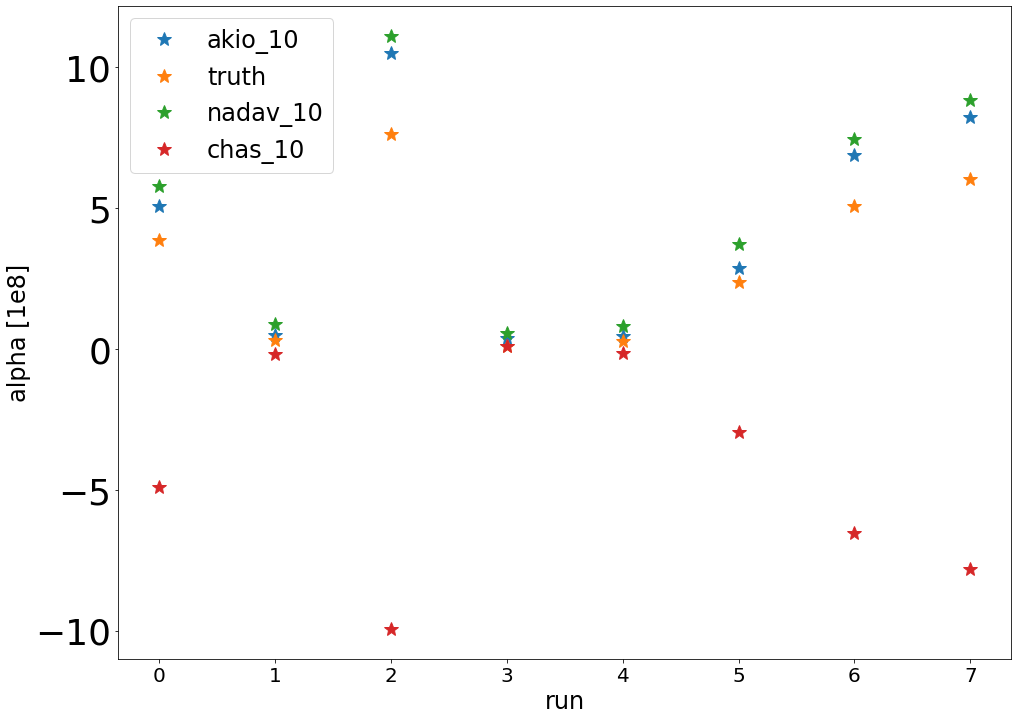

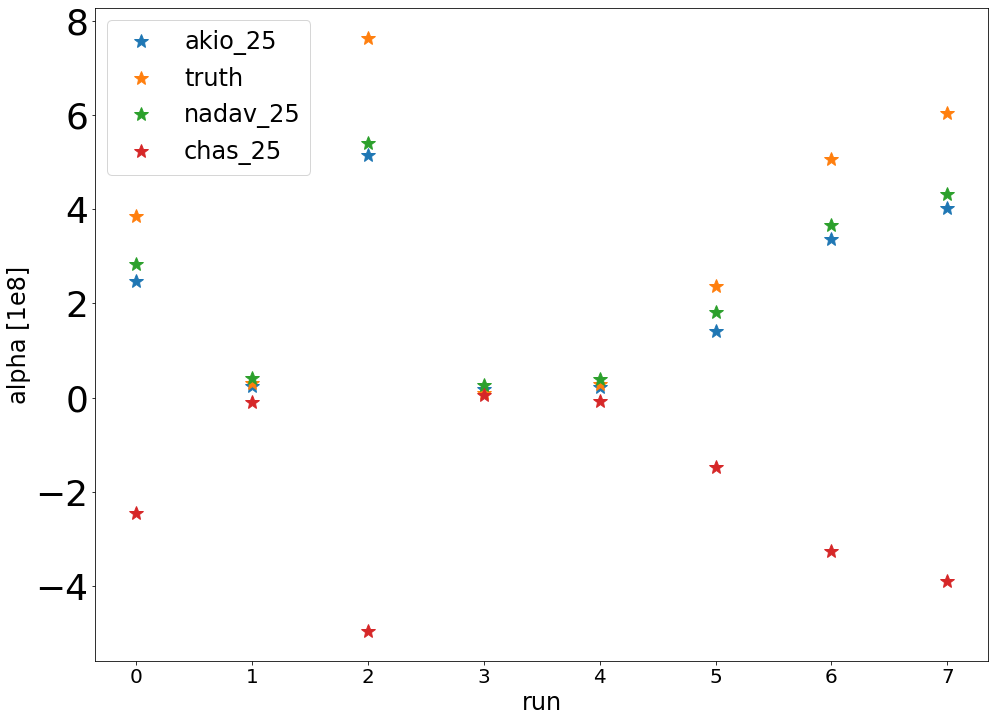

In [227]:
plotting([a5a,t5,n5a,c5a],["akio_10","truth","nadav_10","chas_10"])
plotting([a5b,t5,n5b,c5b],["akio_25","truth","nadav_25","chas_25"])

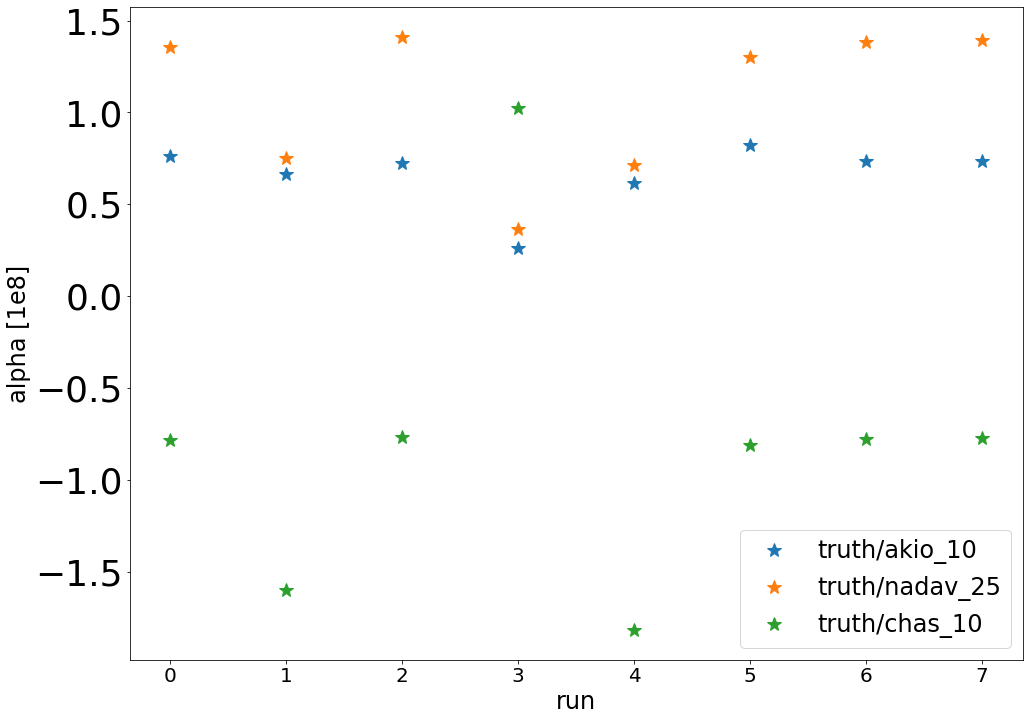

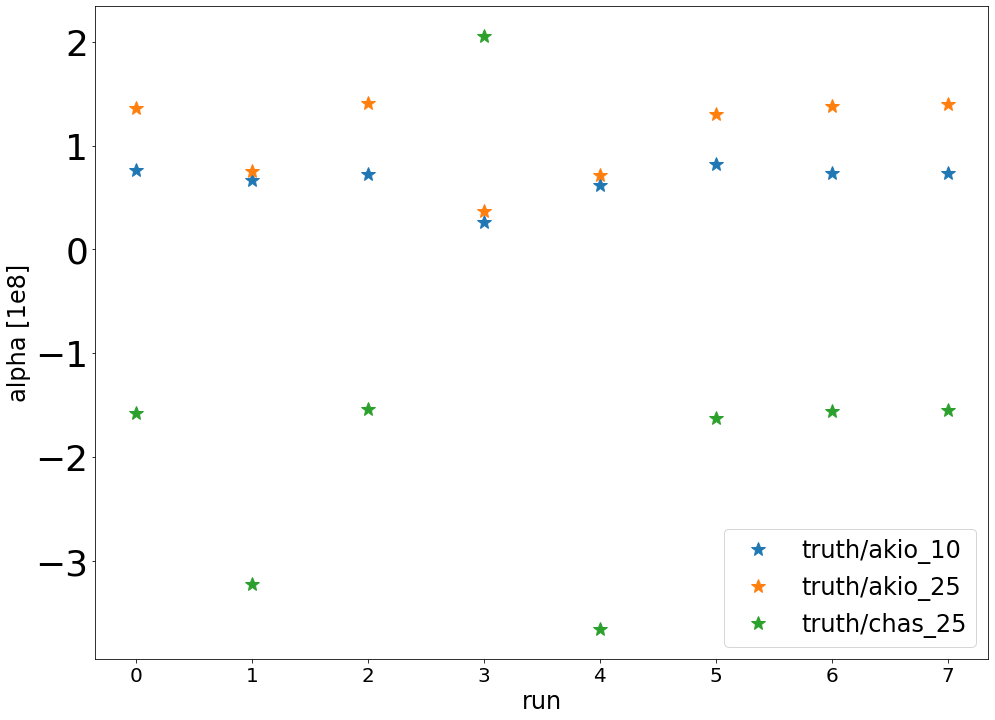

In [228]:
plotting([np.divide(t5,a5a),np.divide(t5,n5b),np.divide(t5,c5a)],["truth/akio_10","truth/nadav_25","truth/chas_10"])
plotting([np.divide(t5,a5a),np.divide(t5,n5b),np.divide(t5,c5b)],["truth/akio_10","truth/akio_25","truth/chas_25"])

In [229]:
t6 = df.alpha[(df["lambda"]==12) & (df["direction"]=="pull") & (df['phase_val']=="Flip") ]/1e8
print(t6)
print(len(t6))

15    7.67
26    2.26
36    4.88
40    6.45
60    6.29
75    5.91
78    5.82
93    7.66
Name: alpha, dtype: float64
8


In [230]:
a6a=df.akio_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]
a6b=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]

n6a=df.nadav_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]
n6b=-df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]

c6a=df.chas_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]
c6b=df.chas_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]
c6c= df.chas_alpha_l12_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Flip")  ]

print(c6c)
print(a6a,a6b,n6a,n6b,c6a,c6b)
print(len(a6a),len(a6b),len(c6a))

15    4.356034
26    1.404155
36    2.833908
40    3.690284
60    3.600202
75    3.395776
78    3.346792
93    4.350464
Name: chas_alpha_l12_p, dtype: float64
15    1.06
26    0.89
36    1.07
40    1.23
60    1.24
75    1.25
78    1.25
93    1.32
Name: akio_alpha_l10_p, dtype: float64 15    0.29
26    0.29
36    0.29
40    0.29
60    0.30
75    0.30
78    0.29
93    0.40
Name: akio_alpha_l10_n, dtype: float64 15         NaN
26    3.156457
36    6.464115
40    8.467440
60    8.262797
75    7.777813
78    7.662775
93         NaN
Name: nadav_alpha_l10_p, dtype: float64 15   NaN
26   NaN
36   NaN
40   NaN
60   NaN
75   NaN
78   NaN
93   NaN
Name: nadav_alpha_l10_n, dtype: float64 15    5.801848
26    1.870200
36    3.774507
40    4.915126
60    4.795144
75    4.522866
78    4.457624
93    5.794428
Name: chas_alpha_l10_p, dtype: float64 15    5.801848
26    1.870200
36    3.774507
40    4.915126
60    4.795144
75    4.522866
78    4.457624
93    5.794428
Name: chas_alpha_l10_n, dtype: float

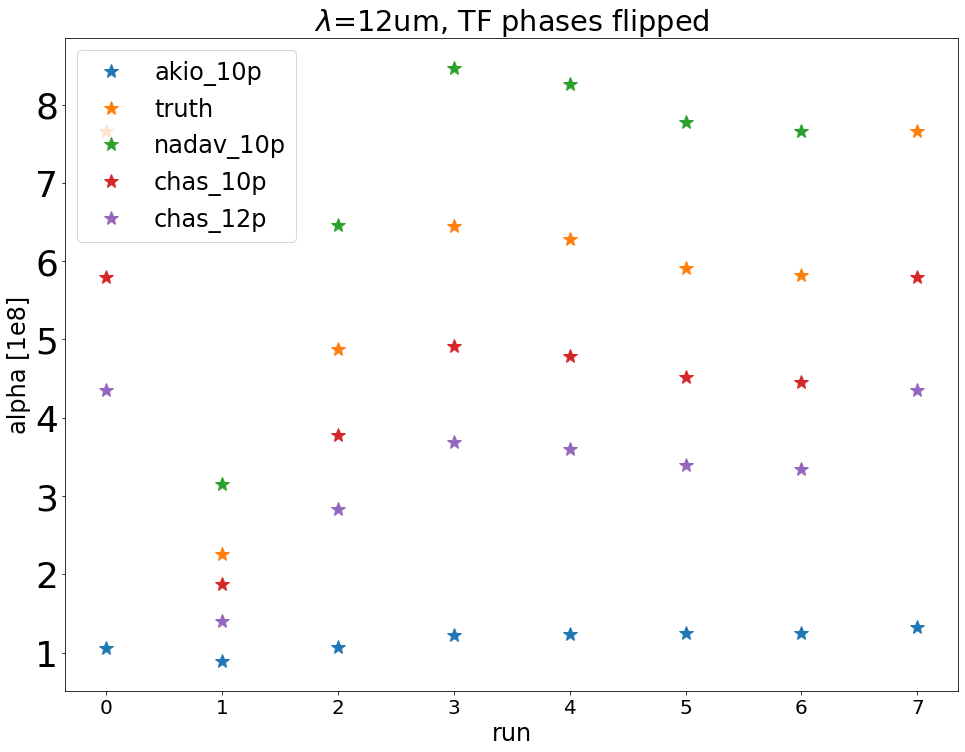

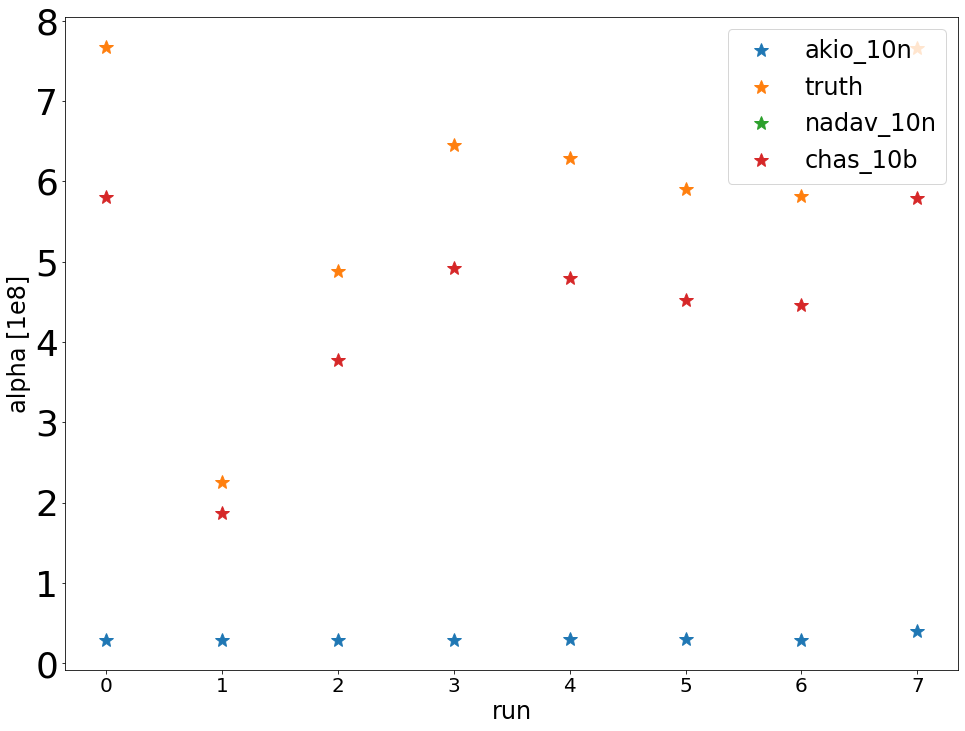

In [231]:
plotting([a6a,t6,n6a,c6a,c6c],["akio_10p","truth","nadav_10p","chas_10p","chas_12p"],Title="$\lambda$=12um, TF phases flipped")
plotting([a6b,t6,n6b,c6b],["akio_10n","truth","nadav_10n","chas_10b"])

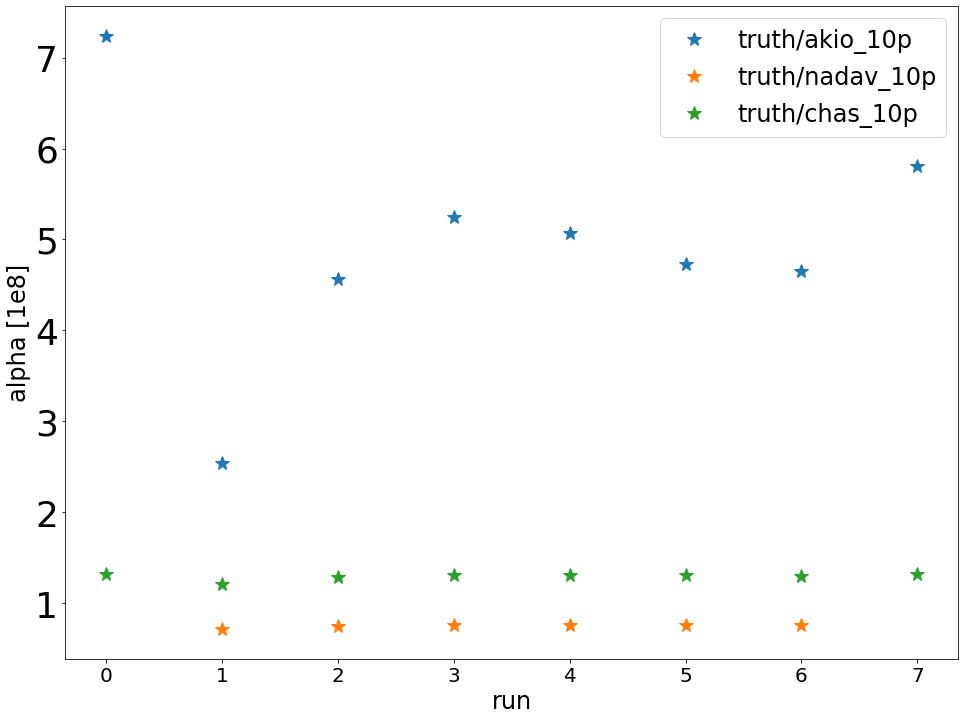

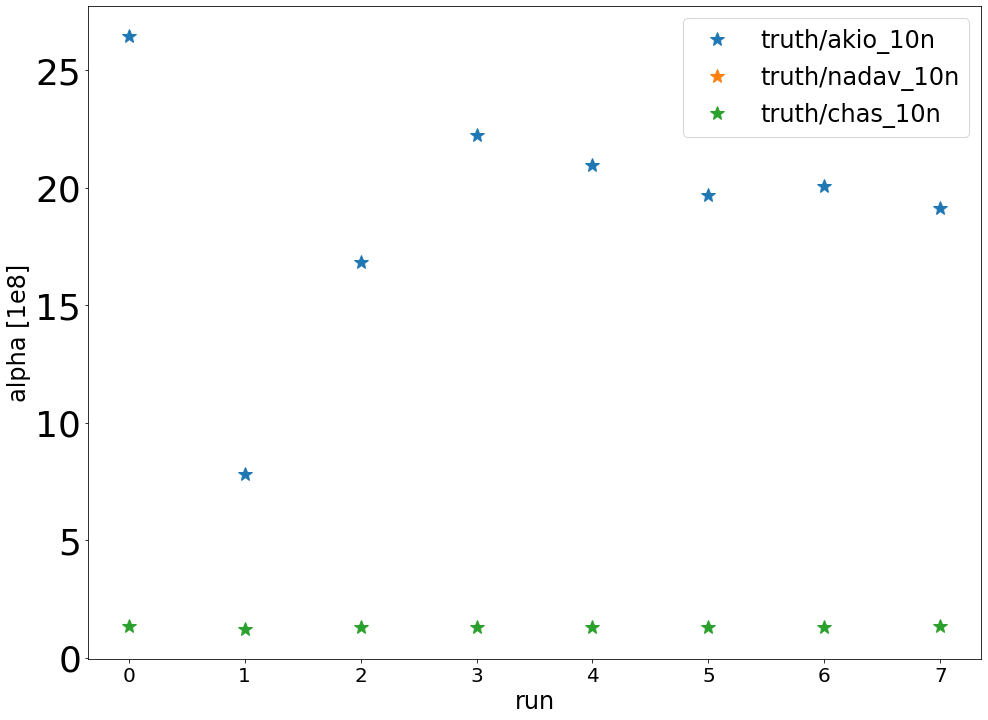

In [232]:
plotting([np.divide(t6,a6a),np.divide(t6,n6a),np.divide(t6,c6a)],["truth/akio_10p","truth/nadav_10p","truth/chas_10p"])
plotting([np.divide(t6,a6b),np.divide(t6,n6b),np.divide(t6,c6b)],["truth/akio_10n","truth/nadav_10n","truth/chas_10n"])

In [233]:
t7 = df.alpha[(df["lambda"]==12) & (df["direction"]=="pull") & (df['phase_val']=="Random") ]
print(t7)
print(len(t7))

31    100000000.0
45    100000000.0
55    100000000.0
88    100000000.0
Name: alpha, dtype: float64
4


In [234]:
a7a=df.akio_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]
a7b=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]

n7a=df.nadav_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]
n7b=-df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]

c7a=df.chas_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]
c7b=df.chas_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random")  ]


print(a7a,a7b,n7a,n7b)
print(len(a7a),len(a7b))

31    0.46
45    0.33
55    0.40
88    0.44
Name: akio_alpha_l10_p, dtype: float64 31    0.38
45    0.48
55    0.43
88    0.36
Name: akio_alpha_l10_n, dtype: float64 31    0.592133
45    0.420832
55         NaN
88    1.477102
Name: nadav_alpha_l10_p, dtype: float64 31    0.684363
45         NaN
55    0.595197
88         NaN
Name: nadav_alpha_l10_n, dtype: float64
4 4


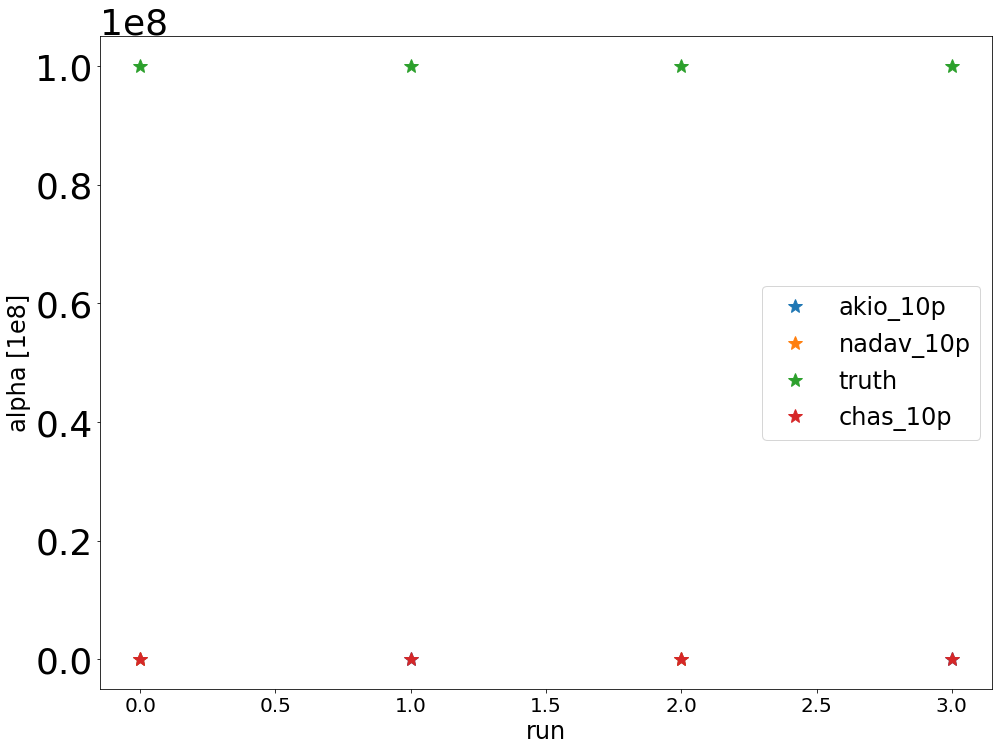

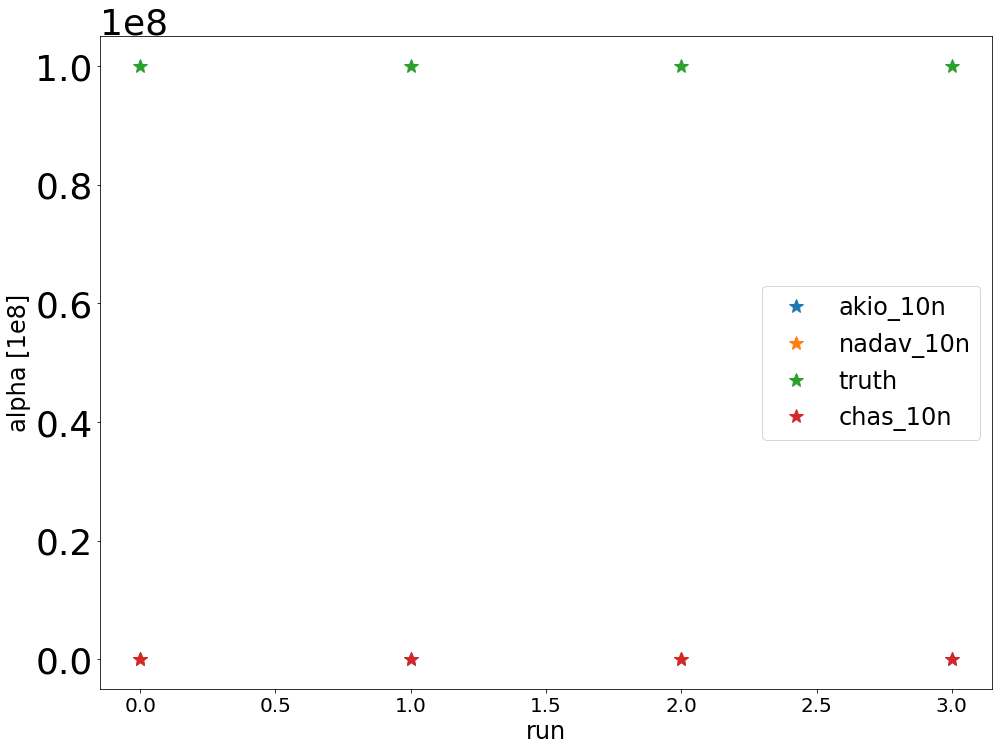

In [235]:
plotting([a7a,n7b,t7,c7a],["akio_10p","nadav_10p","truth","chas_10p"])
plotting([a7b,n7b,t7,c7b],["akio_10n","nadav_10n","truth","chas_10n"])

In [236]:
t8 = df.alpha[(df["lambda"]==12) & (df["direction"]=="pull") & (df['phase_val']=="Random_TF") ]/1e8
print(t8)
print(len(t8))

2     1.0
38    1.0
42    1.0
98    1.0
Name: alpha, dtype: float64
4


In [237]:
a8a=df.akio_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]
a8b=-df.akio_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]

n8a = df.nadav_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]
n8b= -df.nadav_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]


c8a = df.chas_alpha_l10_p[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]
c8b= df.chas_alpha_l10_n[(df["lambda"]==12)  & (df["direction"]=="pull") & (df['phase_val']=="Random_TF")  ]


print(a8a,a8b,n8a,n8b,c8a,c8b)
print(len(a8a),len(a8b))

2     1.54
38    1.55
42    1.56
98    1.55
Name: akio_alpha_l10_p, dtype: float64 2     0.29
38    0.29
42    0.29
98    0.30
Name: akio_alpha_l10_n, dtype: float64 2     1.747108
38    1.746710
42    1.746785
98    1.747039
Name: nadav_alpha_l10_p, dtype: float64 2    NaN
38   NaN
42   NaN
98   NaN
Name: nadav_alpha_l10_n, dtype: float64 2     1.559049
38    1.559999
42    1.560145
98    1.559706
Name: chas_alpha_l10_p, dtype: float64 2     1.559049
38    1.559999
42    1.560145
98    1.559706
Name: chas_alpha_l10_n, dtype: float64
4 4


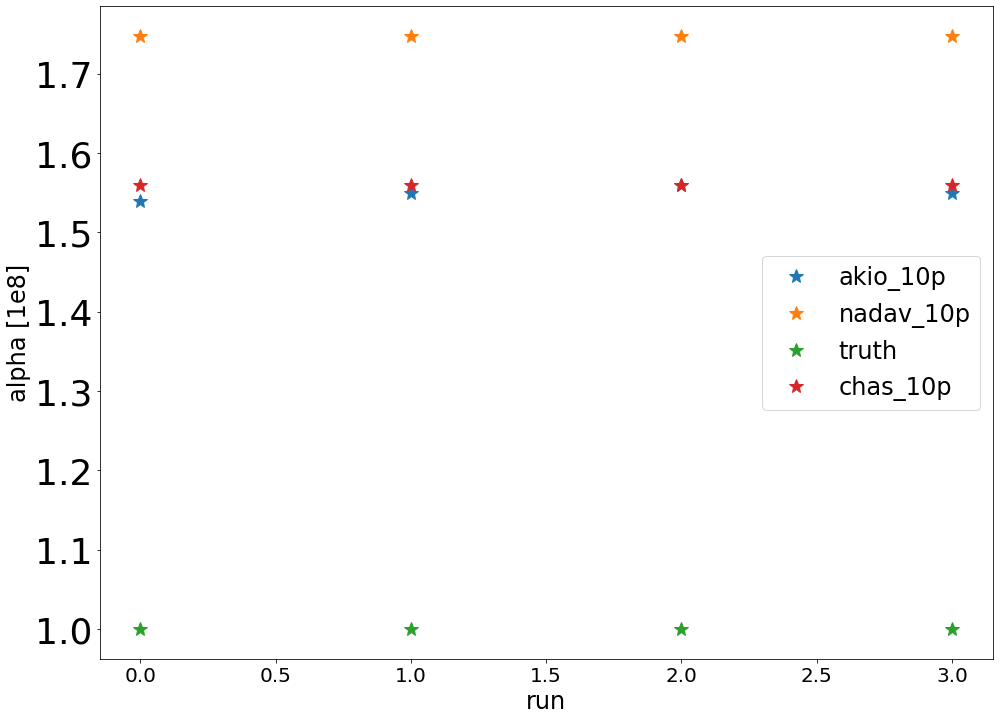

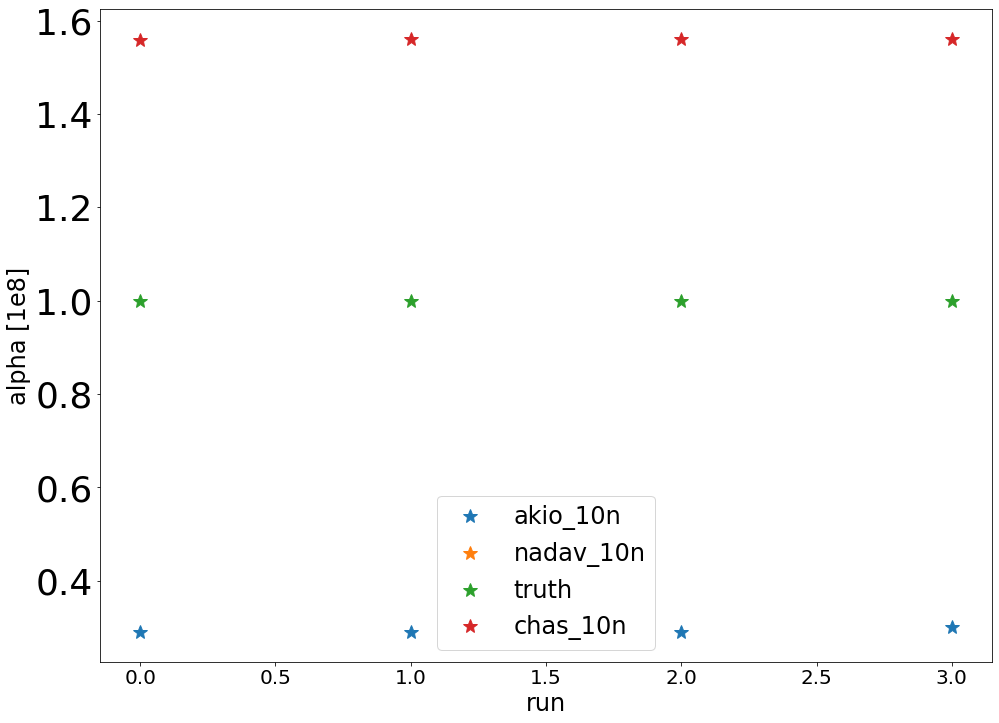

In [238]:
plotting([a8a,n8a,t8,c8a],["akio_10p","nadav_10p","truth","chas_10p"])
plotting([a8b,n8b,t8,c8b],["akio_10n","nadav_10n","truth","chas_10n"])

In [239]:
df.to_pickle("Akio_Nadav_Chas_MLE_2.p")

In [240]:
df.to_csv("Akio_Nadav_Chas_MLE_2.csv")